## Replication for "Asymmetry by Design", March 22, 2020
### By Adam Goldstein and Charlie Eaton

### Appendix Figure A2: Regression adjusted means for 2 or more brand multibrand indicator

In [1]:
%set graph_format svg

In [2]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/asymmetry_20191229.dta", clear
quietly set scheme plotplain
quietly set more off

quietly replace alt2multi_brands_all=alt2multi_brands_all2

quietly label define alt2multi_brands_all 0 "1 brand" 1 "2 or more brands"
quietly label values alt2multi_brands_all alt2multi_brands_all

*quietly collapse (first) instnm*, by(unitid)
*describe

In [3]:
*Adjusted Tuition
quietly reg tuitionall_c_w i.alt2multi_brands_all selective white_share_w black_share_w hisp_share_w ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz ///
i.iclevel i.year i.state_ i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Annual price of tuition (2015 $)") ///
name(adjusted_tuition, replace) graphregion(margin(large)) xlabel(13000(1000)17000,format(%10.0fc) nogrid) ylab(, nogrid)

In [4]:
*Adjusted Loans
quietly reg loan_amount_borrower_c_w i.alt2multi_brands_all selective white_share_w ///
black_share_w hisp_share_w    ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz ///
i.iclevel i.year i.state_ i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

In [5]:
quietly margins i.alt2multi_brands_all, atmeans

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("First year loan borrowing (2015 $)") ///
xlabel(6500(500)8500, format(%10.0fc) nogrid) ylab(, nogrid)  graphregion(margin(large)) ///
name(adjusted_loan, replace) graphregion(margin(large)) 

In [6]:
*Adjusted Faculty

quietly reg ft_faculty_per_100fte_w i.alt2multi_brands_all selective white_share_w ///
black_share_w hisp_share_w dpcttype* ///
i.iclevel i.year i.state_ i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Fulltime faculty per 100 FTE students") graphregion(margin(large)) ///
name(adjusted_faculty, replace) graphregion(margin(large)) xlab(2(.5)4, nogrid) ylab(, nogrid)

In [7]:
*Adjusted Grad Rate
quietly reg grad_rate_150_p2yr_w i.alt2multi_brands_all selective ///
pct2yrchrtgrbkaat pct2yrchrtgrhispt pct2yrchrtgrwhitt   ///
dpcttype* i.year i.iclevel i.state_n pell_grants_per_fte_c_w, cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans level(95)

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Graduation rate (lower degree/certificate)") graphregion(margin(large)) ///
name(adjusted_grad_rate2yr, replace) xlab(.2(.1).6)  

In [8]:
*Adjusted Grad Rad
quietly reg grad_rate_150_p4yr_w i.alt2multi_brands_all selective  ///
pct4yrchrtgrbkaat_w pct4yrchrtgrwhitt_w pct4yrchrtgrhispt_w ///
dpcttype* i.year i.state_n i.iclevel i.state_n pell_grants_per_fte_c_w, cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans level(95)

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Graduation rate (4-year degree)") graphregion(margin(large)) ///
name(adjusted_grad_rate4yr, replace) xlab(.2(.1).6)

In [9]:
*Adjusted Earnings
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/d_OPEID_asymmetry.dta", clear
quietly drop if rankopeid!=1
quietly sort opeid year

quietly replace alt2multi_brands_all=alt2multi_brands_all2

quietly by opeid: gen lagmulti=alt2multi_brands_all[_n-2]

quietly label define alt2multi_brands_all 0 "1 brand" 1 "2 or more brands"
quietly label values lagmulti alt2multi_brands_all
quietly label values alt2multi_brands_all alt2multi_brands_all

quietly xtset opeid year

quietly reg mn_earn_wne_p6_c_w i.lagmulti selective i.iclevel ///
white_share_w black_share_w hisp_share_w ///
dpcttype* i.year i.state_n earn_pct_lo  , cluster(systemid) rob noomitted

quietly margins i.lagmulti, atmeans level( 95)

quietly marginsplot, horizontal unique recast(scatter)  scale(3) xsize(4.5) ysize(1) ///
title(Mean pay 6 years after school (2015 $)) ytitle("") xtitle("") scheme(plotplain) ///
name(adjusted_earnings, replace) xlab(31000(1000)35000, format(%10.0fc) nogrid) ylab(, nogrid) graphregion(margin(large))

In [10]:
*Adjusted Repayment
quietly replace rpy_3yr_rt_supp_w=rpy_3yr_rt_supp_w/100
quietly reg rpy_3yr_rt_supp_w i.lagmulti selective i.iclevel ///
white_share_w black_share_w hisp_share_w ///
dpcttype* i.year i.state_n rpy_3yr_pct_lo  , cluster(systemid) rob noomitted

quietly margins i.lagmulti, atmeans level( 95)

quietly marginsplot, horizontal unique recast(scatter) scale(3) xsize(4.5) ysize(1) ///
xtitle(Students who repaid any debt by 3 years after school (% )) ytitle("") xtitle("") ///
title("Share students who repaid any debt after 3 years") scheme(plotplain) ///
name(adjusted_repay, replace) xlab(.32(.03).44, nogrid) ylab(, nogrid)  graphregion(margin(large))

In [11]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/d_OPEID_asymmetry.dta", clear

quietly replace alt2multi_brands_all=alt2multi_brands_all2

quietly by opeid: gen lagmulti=alt2multi_brands_all[_n-2]

quietly label define alt2multi_brands_all 0 "1 brand" 1 "2 or more brands"
quietly label values lagmulti alt2multi_brands_all
quietly label values alt2multi_brands_all alt2multi_brands_all

**
quietly gen borrower_defense_100student = claimcount / fte_count * 100
winsor borrower_defense_100student, p(.01) gen(borrower_defense_100student_w)

quietly poisson borrower_defense_100student_w i.alt2multi_brands_all selective ///
white_share_w black_share_w hisp_share_w  ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz ///
i.iclevel i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Borrower defense claims per 100 students") ///
name(borrower_defense, replace) graphregion(margin(large)) xlab(0(2)8, nogrid) ylab(, nogrid)

In [12]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/asymmetry_20191229.dta", clear

quietly replace alt2multi_brands_all=alt2multi_brands_all2

quietly collapse (rawsum) sftesale sftetotl (mean) grad_rate_150_p_w ///
pctchrtgrbkaat_w pctchrtgrwhitt_w pctchrtgrhispt_w loan_amount_borrower_c_w tuitionall_c_w selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w dist_pell_s ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz  ///
(first) state_n   (min) iclevel (max) law_enf_frst_this_yr alt2multi_brands_all [aweight=all_under], by(systemid year)

quietly label define alt2multi_brands_all 0 "1 brand" 1 "2 or more brands"
quietly label values alt2multi_brands_all alt2multi_brands_all

quietly gen fracsales2= sftesale /sftetotl

quietly xtset systemid year

In [13]:
**Adjusted Sales
quietly reg fracsales2 i.alt2multi_brands_all selective ///
white_share_w black_share_w hisp_share_w dpcttype* pell_grants_per_fte_c_w  ///
i.iclevel i.year i.state_n  , cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("") title("Share employees in sales") graphregion(margin(large)) ///
name(adjusted_sales, replace) xlabel(0(.03).12)

In [14]:
quietly probit law_enf_frst_this_yr i.alt2multi_brands_all selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w ///
dpcttype* i.iclevel i.state_n i.year, cluster(systemid) rob noomitted

quietly margins i.alt2multi_brands_all, atmeans 

quietly marginsplot, horizontal unique recast(scatter) xtitle("") scale(3) xsize(4.5) ysize(1) ///
ytitle("")  title("Probability of incurring law enforcement action") xtitle("") ///
name(law_enforcement, replace) graphregion(margin(large)) ylab(, nogrid) xlab(0(.015).06)

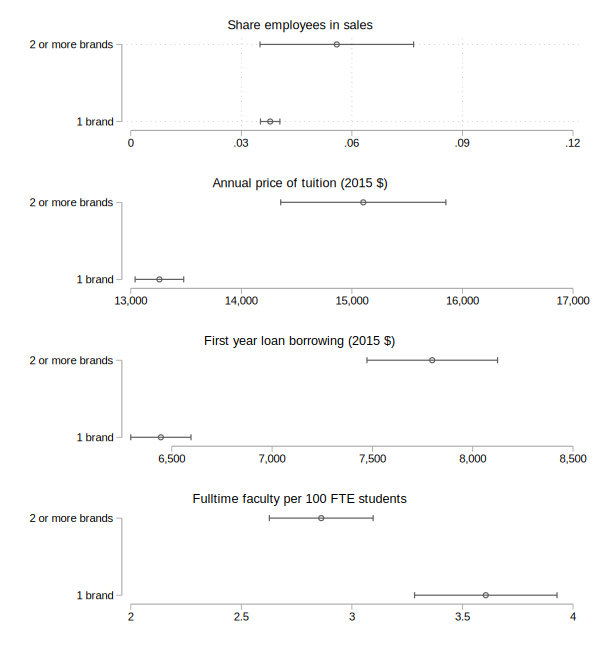




(file /Users/Charlie/Dropbox/Asymmetry by Design/Figures/F4a_regression_adjustme
> nts20191222.pdf written in PDF format)


In [15]:
graph combine adjusted_sales adjusted_tuition adjusted_loan adjusted_faculty ///
, cols(1) ycommon xsize(6.5) ysize(7) scale(.3) ///
graphregion(margin(small)) name(adjusted_demopricefaculty, replace)

graph export "/Users/Charlie/Dropbox/Asymmetry by Design/Figures/F4a_regression_adjustments20191222.pdf", replace

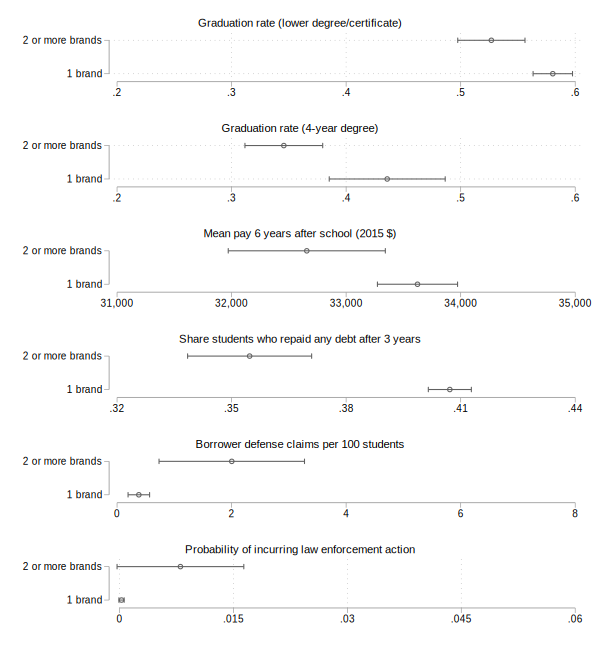




(file /Users/Charlie/Dropbox/Asymmetry by Design/Figures/F4b_regression_adjustme
> nts20191222.pdf written in PDF format)


In [16]:
graph combine adjusted_grad_rate2yr adjusted_grad_rate4yr ///
adjusted_earnings adjusted_repay borrower_defense law_enforcement, cols(1) ycommon ///
xsize(6.5) ysize(7) scale(.3) ///
graphregion(margin(small)) name(adjusted_outcomes, replace)

graph export "/Users/Charlie/Dropbox/Asymmetry by Design/Figures/F4b_regression_adjustments20191222.pdf", replace